In [ ]:
import qsample as qs
import time
import stim
import numpy as np
import matplotlib.pyplot as plt
import time
import re

# QSample

In [ ]:
teleport = qs.Circuit([{"init": {0, 1, 2}},
                       {"H": {1}},
                       {"CNOT": {(1, 2)}},
                       {"CNOT": {(0, 1)}},
                       {"H": {0}},
                       {"measure": {0, 1}}])

In [ ]:
meas = qs.Circuit([{"measure": {2}}], noisy=False)

In [ ]:
def lut(syn):
    op = {0: 'I', 1: 'X', 2: 'Z', 3: 'Y'}[syn]
    return qs.Circuit([{op: {2}}], noisy=False)

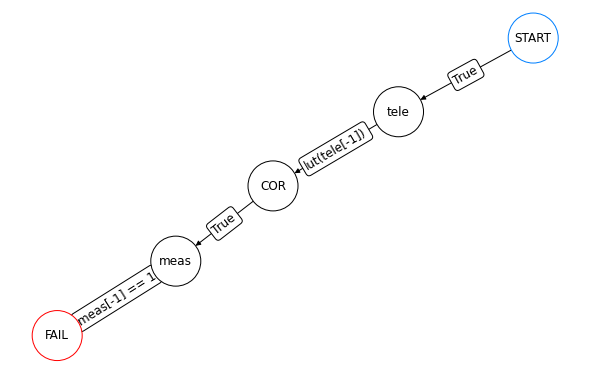

In [ ]:
tele_proto = qs.Protocol(check_functions={'lut': lut})
tele_proto.add_nodes_from(['tele', 'meas'], circuits=[teleport, meas])
tele_proto.add_edge('START', 'tele', check='True')
tele_proto.add_edge('tele', 'COR', check='lut(tele[-1])')
tele_proto.add_edge('COR', 'meas', check='True')
tele_proto.add_edge('meas', 'FAIL', check='meas[-1] == 1')

tele_proto.draw(figsize=(8,5))

In [ ]:
err_model = qs.noise.E1
q = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.5]
err_params = {'q': q}

In [ ]:
begin = time.time()
ss_sam = qs.SubsetSampler(protocol=tele_proto, simulator=qs.StabilizerSimulator,  p_max={'q': 0.1}, err_model=err_model, err_params=err_params, L=3)
ss_sam.run(1000)
end = time.time()
qsample_time = end-begin

p=('1.00e-01',):   0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
v1 = ss_sam.stats()[0]

##

##

##

##

##

##

##

##

In [ ]:
teleport_s = qs.Circuit("""H 1\nCNOT 1 2\nCNOT 0 1\nH 0\nM 0 1\n""")

meas = qs.Circuit("""M 2""", noisy=False)

In [ ]:
def lut(syn):
    op = {0: 'I', 1: 'X', 2: 'Z', 3: 'Y'}[syn]
    return qs.Circuit("\n{} 2\n".format(op), noisy=False)

In [ ]:
begin = time.time()
ss_sam = qs.SubsetSampler(protocol=tele_proto, simulator=qs.StimSimulator, p_max={'q': 0.1}, err_model=err_model, err_params=err_params, L=3)
ss_sam.run(1000)
end = time.time()
stim_time = end-begin

p=('1.00e-01',):   0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
v2 = ss_sam.stats()[0]

0.44299817085266113
1.1689352989196777


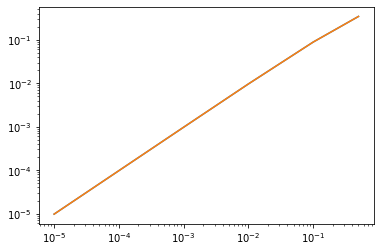

In [ ]:
plt.plot(q, v1)
plt.plot(q, v2)
plt.xscale('log')
plt.yscale('log')

print(qsample_time)
print(stim_time)

In [ ]:
qsample_times = []
stim_times = []

samples = [100, 300, 1000, 3000, 10000, 50000]

for s in samples:
    begin = time.time()
    ss_sam = qs.SubsetSampler(protocol=tele_proto, simulator=qs.StabilizerSimulator,  p_max={'q': 0.01}, err_model=err_model, err_params=err_params, L=3)
    ss_sam.run(s)
    end = time.time()
    qsample_times.append(end-begin)

    begin = time.time()
    ss_sam = qs.SubsetSampler(protocol=tele_proto, simulator=qs.StimSimulator,  p_max={'q': 0.01}, err_model=err_model, err_params=err_params, L=3)
    ss_sam.run(s)
    end = time.time()
    stim_times.append(end-begin)

p=('1.00e-02',):   0%|          | 0/100 [00:00<?, ?it/s]

p=('1.00e-02',):   0%|          | 0/100 [00:00<?, ?it/s]

p=('1.00e-02',):   0%|          | 0/300 [00:00<?, ?it/s]

p=('1.00e-02',):   0%|          | 0/300 [00:00<?, ?it/s]

p=('1.00e-02',):   0%|          | 0/1000 [00:00<?, ?it/s]

p=('1.00e-02',):   0%|          | 0/1000 [00:00<?, ?it/s]

p=('1.00e-02',):   0%|          | 0/3000 [00:00<?, ?it/s]

p=('1.00e-02',):   0%|          | 0/3000 [00:00<?, ?it/s]

p=('1.00e-02',):   0%|          | 0/10000 [00:00<?, ?it/s]

p=('1.00e-02',):   0%|          | 0/10000 [00:00<?, ?it/s]

p=('1.00e-02',):   0%|          | 0/50000 [00:00<?, ?it/s]

p=('1.00e-02',):   0%|          | 0/50000 [00:00<?, ?it/s]

Average ratio of stim time/stabilizer time: 0.84


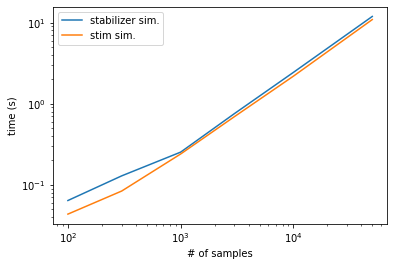

In [ ]:
plt.plot(samples, qsample_times, label = 'stabilizer sim.')
plt.plot(samples, stim_times, label = 'stim sim.')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.ylabel('time (s)')
plt.xlabel('# of samples')

print('Average ratio of stim time/stabilizer time: {:.2f}'.format(np.average(np.array(stim_times)/np.array(qsample_times))))